In [1]:
import rsatoolbox as rsa
import matplotlib.pyplot as plt
import os
import sys
import numpy as np
import pandas as pd
import surfAnalysisPy as surf
import SUITPy as suit
import nibabel as nb
import nitools
from matplotlib.cm import ScalarMappable

# SET PATHS:
baseDir = '/Volumes/Diedrichsen_data$/data/Chord_exp/EFC_patternfMRI'
bidsDir = 'BIDS'
anatomicalDir = 'anatomicals'
freesurferDir = 'surfaceFreesurfer'
surfacewbDir = 'surfaceWB' 
regDir = 'ROI'

/var/folders/63/8xhbqbv102n3hhlv8_fk9lqr0000gn/T/ipykernel_49002/612337717.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


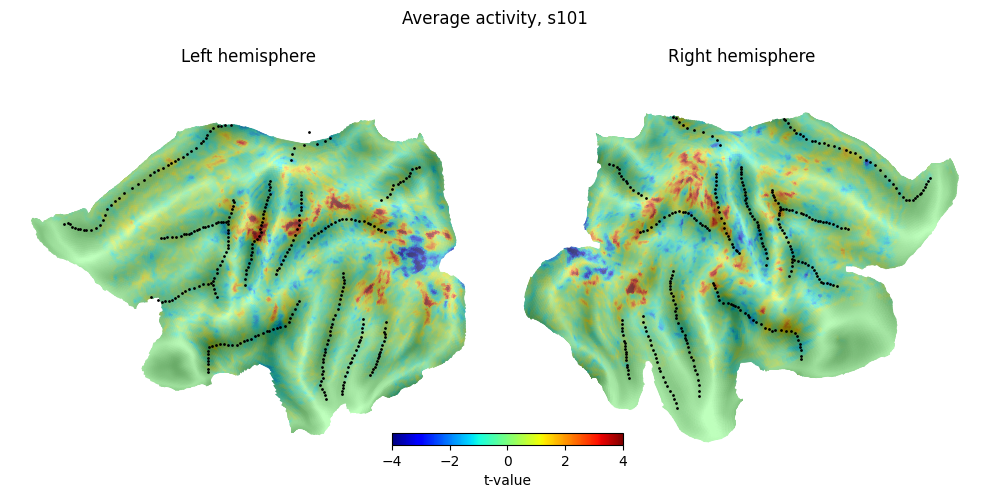

In [2]:
sn = 101
glm = 3
ses = 1
Hem = ['L', 'R']

borders = {'L': './surfAnalysisPy/standard_mesh/fs_L/fs_LR.32k.L.border',
           'R': './surfAnalysisPy/standard_mesh/fs_R/fs_LR.32k.R.border'}

vmin, vmax = -4, 4

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
for ax, H in zip(axs, Hem):
    D = nb.load(os.path.join(baseDir, surfacewbDir, f's{sn}', f'glm{glm}.ses-{ses:02d}.spmT.{H}.func.gii'))
    darray = nitools.get_gifti_data_matrix(D)
    
    plt.sca(ax)
    surf.plot.plotmap(darray.mean(axis=1), f'fs32k_{H}',
                      underlay=None,
                      borders=borders[H],
                      cscale=[vmin, vmax],
                      cmap='jet',
                      underscale=[-1.5, 1],
                      alpha=.5,
                      new_figure=False,
                      colorbar=False,
                      # frame=[xlim[0], xlim[1], ylim[0], ylim[1]]
                      )

# make colorbar
norm = plt.Normalize(vmin=vmin, vmax=vmax)
sm = ScalarMappable(norm=norm, cmap='jet')
cbar = fig.colorbar(sm, ax=[axs[0], axs[1]], orientation='horizontal', fraction=0.03)
cbar.set_label('t-value')

axs[0].set_title('Left hemisphere')
axs[1].set_title('Right hemisphere')

fig.suptitle(f'Average activity, s{sn}')
fig.tight_layout()